## Lab 9
Extraction de primitives

In [1]:
from skimage import feature, data, filters
import numpy as np
import matplotlib.pyplot as plt

## Exercice 1
Essayer de détecter des coins/caractéristiques intéressant avec la méthode Harris. Testez avec différent seuil.

(512, 512) 63 207


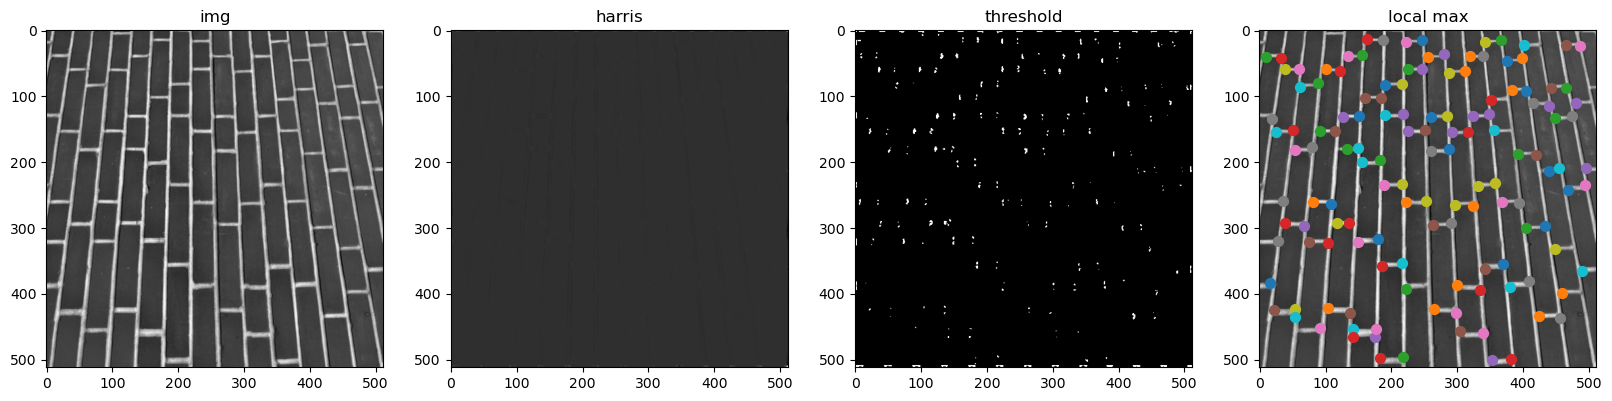

In [19]:
img = data.brick()
print(img.shape, img.min(), img.max())

plt.figure(figsize=(20, 20))

harris = feature.corner_harris(img)
thresh = harris > 0.008
maxima = feature.peak_local_max(img, labels=thresh, min_distance=10)

plt.subplot(141); plt.imshow(img, cmap="gray"); plt.title('img')
plt.subplot(142); plt.imshow(harris, cmap="gray"); plt.title('harris')
plt.subplot(143); plt.imshow(thresh, cmap="gray"); plt.title('threshold')
plt.subplot(144); plt.imshow(img, cmap="gray"); plt.title('local max')

# scatter points
# yx = np.argwhere(thresh)
for y, x in maxima:
    plt.scatter(x, y, s=50)

plt.show()

## Exercice 2
Appliquer un filtre détecteur de forme pour faire resortir les contours continus (lignes/tubes) dans l'image.

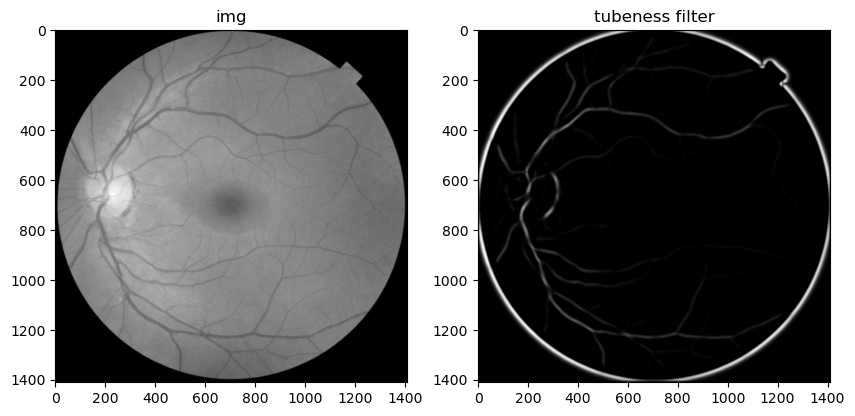

In [25]:
img = data.retina().mean(axis=2)
plt.figure(figsize=(10, 10))
plt.subplot(121); plt.imshow(img, cmap="gray"); plt.title("img")

contour_continus = filters.frangi(img, sigmas=range(10, 14))

plt.subplot(122); plt.imshow(contour_continus, cmap="gray"); plt.title("tubeness filter")
plt.show()

## Exercice 3
Calculer le tenseur (H) pour `sub_img`.

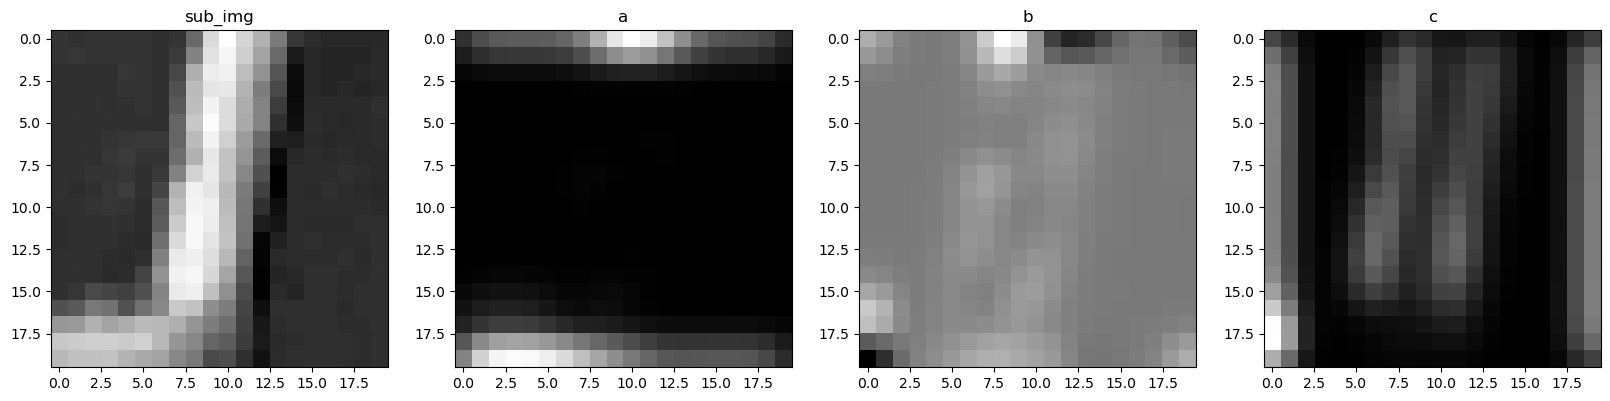

In [29]:
img = data.brick()
sub_img = img[:20, :20]

plt.figure(figsize=(20, 20))

plt.subplot(141); plt.imshow(sub_img, cmap='gray'); plt.title('sub_img')

a, b, c = feature.structure_tensor(sub_img, sigma=1)

plt.subplot(142); plt.imshow(a, cmap='gray'); plt.title('a')
plt.subplot(143); plt.imshow(b, cmap='gray'); plt.title('b')
plt.subplot(144); plt.imshow(c, cmap='gray'); plt.title('c')

plt.show()